# 2017年基礎実験
## Jupyter Notebook を使った大規模データの可視化

本実験では、Jupyter Notebook を使って大規模データの可視化を行います。本実験で扱うデータは生物学実験で得られたデータではありませんが、数値データを可視化し俯瞰することは解析の基礎であり、どのようなデータであれ非常に大切なことです。

### Jupyter Notebook (IPython Notebook) とは
* Python という名のプログラミング言語が使えるプログラミング環境。計算コードと計算結果を同じ場所に時系列で保存できるので、実験系における実験ノートのように、いつどんな処理を行って何を得たのか記録して再現するのに便利。
* [当学の演習室での使い方](https://raw.githubusercontent.com/maskot1977/-/master/%E6%BC%94%E7%BF%92%E5%AE%A4.txt)
* [個人PCでのインストールと始め方](http://www.task-notes.com/entry/20151129/1448794509)
* [小寺研究室](https://github.com/maskot1977/-/blob/master/L1%E3%82%BC%E3%83%9F2015%E5%B0%8F%E5%AF%BA%E7%A0%94%E7%A9%B6%E5%AE%A4.pptx.pdf) では、MacOSX上で右記のようにセットアップしています。> [環境構築](https://sites.google.com/site/masaakikotera/8-python/8-1-huan-jing-gou-zhu)

### まずは、意味が分からなくてもいいので使ってみましょう
* Python にまだ慣れてない人は、[Pythonウォーミングアップ](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/Python%E3%82%A6%E3%82%A9%E3%83%BC%E3%83%9F%E3%83%B3%E3%82%AF%E3%82%99%E3%82%A2%E3%83%83%E3%83%95%E3%82%9A.ipynb) に進んでください。

### 本実習で用いるデータ

<ul>
<li>__「商用航空会社マイレージ」__
<blockquote>
1937年から1960年の各年の、合州国の商用航空会社の課税利用者マイル数 (<a href="http://www.is.titech.ac.jp/~mase/mase/html.jp/temp/airmiles.jp.html">詳細</a>)。

https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/airmiles.txt
</blockquote>

<li>__「ニューヨークの大気状態観測値」__
<blockquote>
ニューヨークの大気状態観測値。1973 年の五月から九月。 (<a href="http://www.is.titech.ac.jp/~mase/mase/html.jp/temp/airquality.jp.html">詳細</a>)。

https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/airquality.txt

<ul>
<li>Ozone: Roosevelt 島における 1300 時から 1500 時までの 平均オゾン量 (parts per billion 単位)。
<li>Solar: セントラルパークにおける 0800 時から 1200 時 の周波数 4000～7700 オングストロームの日射量 (単位 Langleys)。
<li>Wind: La Guardia 空港における毎日の 0700 時から 10000 時の 平均風速 (単位 マイル)。
<li>Temp: La Guardia 空港における一日の最大温度 (単位 華氏)。
</ul>
</blockquote>

<li>__「合州国の州別暴力犯罪率」__
<blockquote>
1973 年の合州国の 50 の州毎の、住民10万人あたりの暴行、殺人、そして強姦による 逮捕数を含む。また都市部人口の割合が与えられている。
 (<a href="http://www.is.titech.ac.jp/~mase/mase/html.jp/temp/USArrests.jp.html">詳細</a>)。

https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/USArrests.txt

<ul>
<li>Murder:	殺人による逮捕（10万あたり）
<li>Assault:	暴行による逮捕（10万あたり）
<li>UrbanPop:	都市部人口比率
<li>Rape:	強姦による逮捕（10万あたり）
</ul>

</blockquote>

<li>__「スポーツテストデータ」__
<blockquote>
中学生104人の運動能力テスト6種と体力測定5種の計測のデータ
(<a href="http://mo161.soci.ous.ac.jp/@d/DoDStat/sports/sports_dataJ.xml">詳細</a>)。

https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/sports_dataJt.txt

<ul>
<li>1	50mRun	50m走
<li>2	longjump	走り幅跳び
<li>3	handball	ハンドボール投げ
<li>4	chinning	懸垂
<li>5	sidestep	反復横跳び
<li>6	vertump	垂直跳び
<li>7	back	背筋力
<li>8	grip	握力（両手平均）
<li>9	backward	上体そらし
<li>10	forward	立位体前屈
<li>11	stepping	踏み台昇降
</ul>

</blockquote>

<li>__「好きなアイスクリームアンケート」__
<blockquote>
男性４０名、女性４０名に、２１種類のアイスクリームの好みに応じて点数（１〜９）をつけてもらったアンケート結果。
(<a href="http://kogolab.chillout.jp/elearn/icecream/">詳細</a>)。

https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/icecream_chosa.txt

<ol>
<li>ID 
<li>gender 性別
<li>age 年齢
<li>birth_order 兄弟姉妹の中で上から何番目か
<li>frequency 来店頻度
<li>vanilla バニラ
<li>strawberry ストロベリー
<li>milk_tea ミルクティー
<li>macadamia_nuts マカダミアナッツ
<li>cookie クッキー
<li>chocolate チョコ
<li>melon メロン
<li>coffee コーヒー
<li>almond アーモンド
<li>rum_raisin ラムレーズン
<li>mint ミント
<li>banana バナナ
<li>caramel キャラメル
<li>walnut クルミ
<li>cassis カシス
<li>chocolate_chips チョコチップ
<li>orange オレンジ
<li>green_tea 抹茶
<li>marron マロン
<li>chocolate_mint チョコミント
<li>adzuki-bean あずき 
</ol>

</blockquote>

<li>__「新国民生活指標データ」__

<blockquote>
都道府県の豊かさを表すために，経済企画庁が策定した新国民生活指標の「住む」ことに関する平成11年の発表データ。
 (<a href="http://mo161.soci.ous.ac.jp/@d/DoDStat/PLIlive/PLIlive_dataJ.xml">詳細</a>)。

https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/PLIlive_dataJ.txt

<ul>
<li>1	Pref	都道府県	都道府県	
<li>2	NonRep	危険住宅	危険・修理不能住宅比率(%)	
<li>3	OverMin	最低居住	最低居住水準以上住宅比率(%)	
<li>4	Rent	借家家賃	借家の1畳当たり実質家賃(円)	
<li>5	HomeOwn	持家比率	持家比率(%)	
<li>6	CompPol	公害苦情	公害苦情受理件数(人口十万人比)[-]	
<li>7	NumClime	重要犯罪	重要刑法犯罪認知件数(人口十万人比)[-]	
<li>8	NumLarc	重要窃盗	重要窃盗犯認知件数(人口十万人比)[-]	
<li>9	TrafAcci	交通事故	交通事故発生件数(人口十万人比)[-]	
<li>10	Fire	建物火災	建物火災出火件数(住宅十万戸比)[-]	
<li>11	DspRubb	ごみ処理率	ごみ衛生処理率(%)	
<li>12	Sidewalk	歩道設置率	一般道路歩道設置率(%)	
<li>13	MedFacil	医療機関	最寄りの医療機関までの距離500ｍ未満住宅比率(%)	
<li>14	OverOrd	居住水準	誘導居住水準以上住宅比率(%)	
<li>15	Sunshine	日照時間	日照時間5時間以上住宅比率(%)
<li>16	NumMat	畳数	1人当たり畳数(畳)	
<li>17	AreaResi	敷地面積	1住宅当たり敷地面積(m2)	
<li>18	Transpt	交通機関	最寄りの交通機関1km未満住宅比率(%)	
<li>19	AreaPark	公園面積	1人当たり公園面積(m2)	
<li>20	Sewarage	下水普及率	下水道等普及率(%)	
<li>21	Recycle	リサイクル率	リサイクル率(%)	
<li>22	AmtRubb	ごみ排出量	1人1日当たりごみ排出量(g)[-]	
<li>23	AvgMin	通勤通学時間	通勤・通学平均時間(分)[-]	
<li>24	Pavement	道路舗装率	一般道路舗装率(%)
</ul>

</blockquote>

</ul>

### 本実習スタート
* 本実習ではまず、下のプログラムを順次実行してもらいます。各自の画面中の IPython Notebook のセルに順次入力して（コピペ可）、「Shift + Enter」してください。
* 最後に、課題を解いてもらいます。課題の結果を、指定する方法で指定するメールアドレスまで送信してください。

In [10]:
#（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [11]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート

In [12]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

まず__「商用航空会社マイレージ」__データを使って、簡単なグラフの描き方を練習してみましょう。

In [13]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/airmiles.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'airmiles.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'airmiles.txt') # Python 3 の場合

('airmiles.txt', <http.client.HTTPMessage at 0x109f95860>)

In [16]:
# データの読み込み。df は pandas (pd) が用意した「データフレーム」型の変数。
# sep='\t' は、列の区切りがタブ '\t' であることを意味する。
# header=None は、冒頭の１行目からデータが始まることを意味する。
df = pd.read_csv('airmiles.txt', sep='\t', header=None) 

In [15]:
# 読み込んだデータの確認
df

,0,1
0,1937,412
1,1938,480
2,1939,683
3,1940,1052
4,1941,1385
5,1942,1418
6,1943,1634
7,1944,2178
8,1945,3362
9,1946,5948


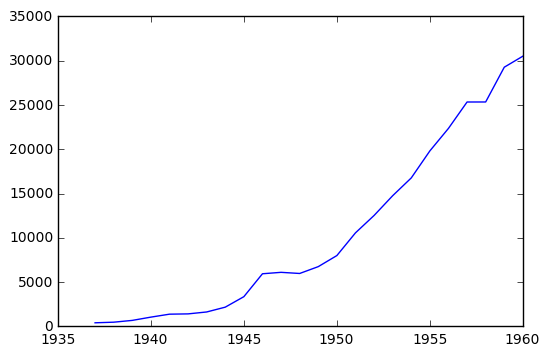

In [18]:
# とりあえず可視化してみる。
# iloc[行,列] は、データフレーム中から数字で指定した行・列を取り出すメソッド。
# 「:」は、すべての行、または全ての列を選択するという意味。
# plot(x座標,y座標)は、指定したx座標,y座標の点の集合から折れ線グラフを描くメソッド。
plt.plot(df.iloc[:, 0],df.iloc[:, 1])

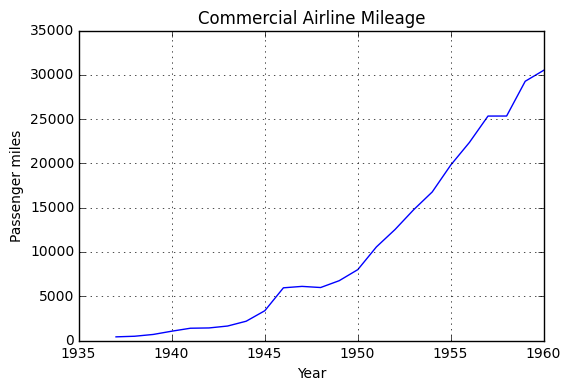

In [8]:
#もうちょっとカッコ良くする
plt.plot(df.iloc[:, 0],df.iloc[:, 1])
plt.title('Commercial Airline Mileage')
plt.xlabel('Year')
plt.ylabel('Passenger miles')
plt.grid()
plt.show()

次は、__「ニューヨークの大気状態観測値」__のデータを解析してみましょう。

In [20]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/airquality.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'airquality.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'airquality.txt') # Python 3 の場合

('airquality.txt', <http.client.HTTPMessage at 0x10a692be0>)

In [21]:
# データの読み込み
df = pd.read_csv('airquality.txt', sep='\t') 

In [22]:
# 読み込んだデータの確認
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41,190,7.4,67,5,1
1,2,36,118,8.0,72,5,2
2,3,12,149,12.6,74,5,3
3,4,18,313,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5
5,6,28,NaN,14.9,66,5,6
6,7,23,299,8.6,65,5,7
7,8,19,99,13.8,59,5,8
8,9,8,19,20.1,61,5,9
9,10,NaN,194,8.6,69,5,10


In [23]:
# 欠損値を含むデータを除外
df.dropna()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41,190,7.4,67,5,1
1,2,36,118,8.0,72,5,2
2,3,12,149,12.6,74,5,3
3,4,18,313,11.5,62,5,4
6,7,23,299,8.6,65,5,7
7,8,19,99,13.8,59,5,8
8,9,8,19,20.1,61,5,9
11,12,16,256,9.7,69,5,12
12,13,11,290,9.2,66,5,13
13,14,14,274,10.9,68,5,14


(array([ 27.,  33.,  19.,   8.,  10.,   7.,   3.,   2.,   1.,   1.]),
 array([   1. ,   17.7,   34.4,   51.1,   67.8,   84.5,  101.2,  117.9,
         134.6,  151.3,  168. ]),
 <a list of 10 Patch objects>)

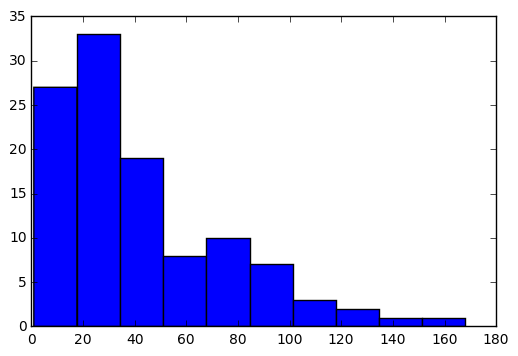

In [24]:
# ヒストグラムを作成する
plt.hist(df.dropna()["Ozone"])

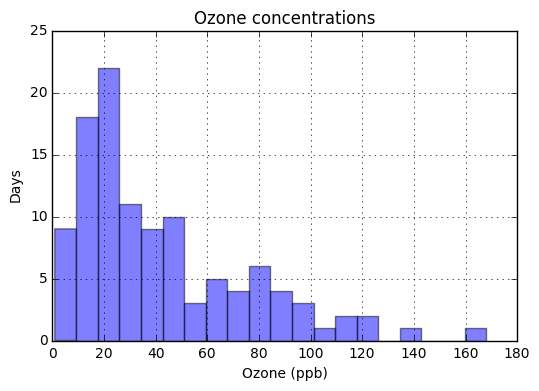

In [25]:
# もう少しカッコ良くする
plt.hist(df.dropna()["Ozone"], bins=20, alpha=0.5)
plt.title('Ozone concentrations')
plt.xlabel('Ozone (ppb)')
plt.ylabel('Days')
plt.grid()
plt.show()

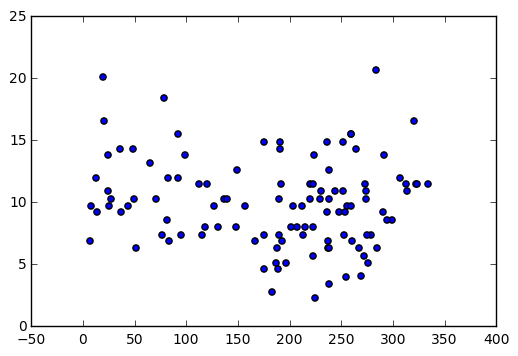

In [26]:
# 散布図を描く
plt.scatter(df.dropna()["Solar.R"], df.dropna()["Wind"])

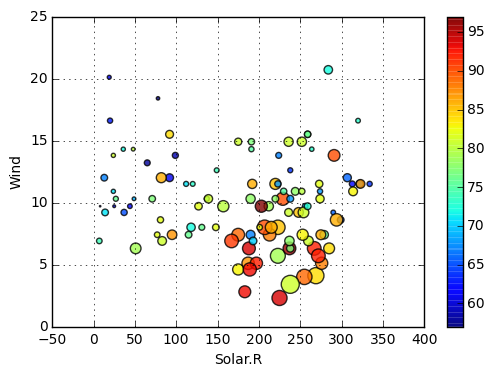

In [27]:
# もう少しカッコ良くする
x_axis, x_label = df.dropna()["Solar.R"], "Solar.R"
y_axis, y_label = df.dropna()["Wind"], "Wind"
sizes, size_label = df.dropna()["Ozone"], "Ozone"
colors, color_label = df.dropna()["Temp"], "Temp"
plt.scatter(x_axis, y_axis, s=sizes, c=colors, alpha=0.8)
plt.colorbar(alpha=0.8)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()
plt.show()

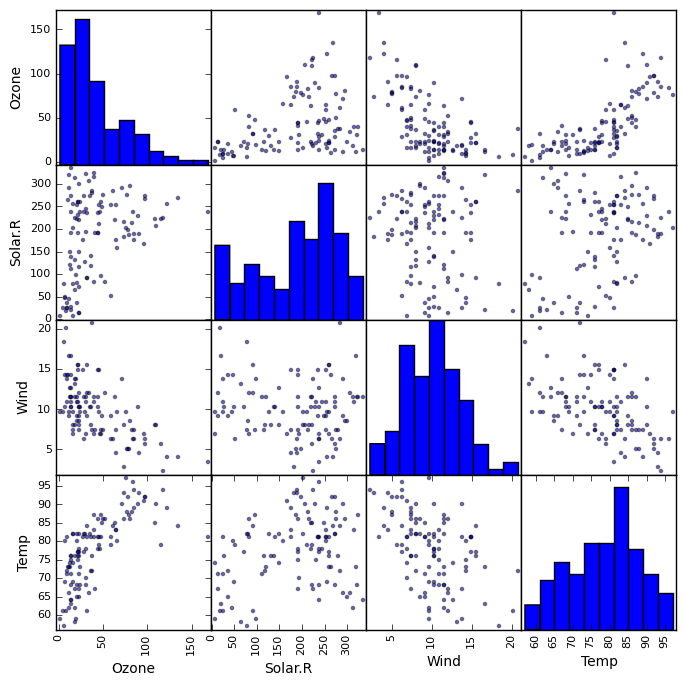

In [28]:
# 散布図行列
plotting.scatter_matrix(df.dropna()[df.columns[1:5]], figsize=(8, 8)) 
plt.show()

In [30]:
# 相関行列
pd.DataFrame(np.corrcoef(df.dropna().iloc[:, 1:5].T.as_matrix().tolist()), 
             columns=df.columns[1:5], index=df.columns[1:5])

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348342,-0.612497,0.698541
Solar.R,0.348342,1.000000,-0.127183,0.294088
Wind,-0.612497,-0.127183,1.000000,-0.497190
Temp,0.698541,0.294088,-0.497190,1.000000


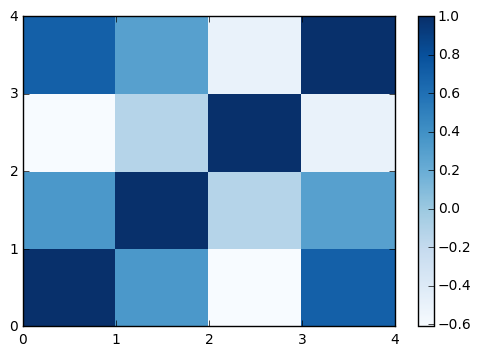

In [31]:
# 相関行列をカラーマップで見やすく。上下が逆になっていることに注意。
corrcoef = np.corrcoef(df.dropna().iloc[:, 1:5].T.as_matrix().tolist())
plt.pcolor(corrcoef, cmap=plt.cm.Blues)
plt.colorbar()
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlim([0, len(corrcoef)])
plt.ylim([0, len(corrcoef)])
plt.show()

以上の解析結果から、Ozone, Solar.R, Wind, Temp の間の関係を考察してみてください（課題１）。

次は__「合州国の州別暴力犯罪率」__のデータを解析してみましょう。

In [32]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/USArrests.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'USArrests.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'USArrests.txt') # Python 3 の場合

('USArrests.txt', <http.client.HTTPMessage at 0x10a202da0>)

In [33]:
df = pd.read_csv('USArrests.txt', sep='\t') # データの読み込み

In [34]:
pd.DataFrame(df).head() # 先頭N行を表示する。カラムのタイトルも確認する。

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


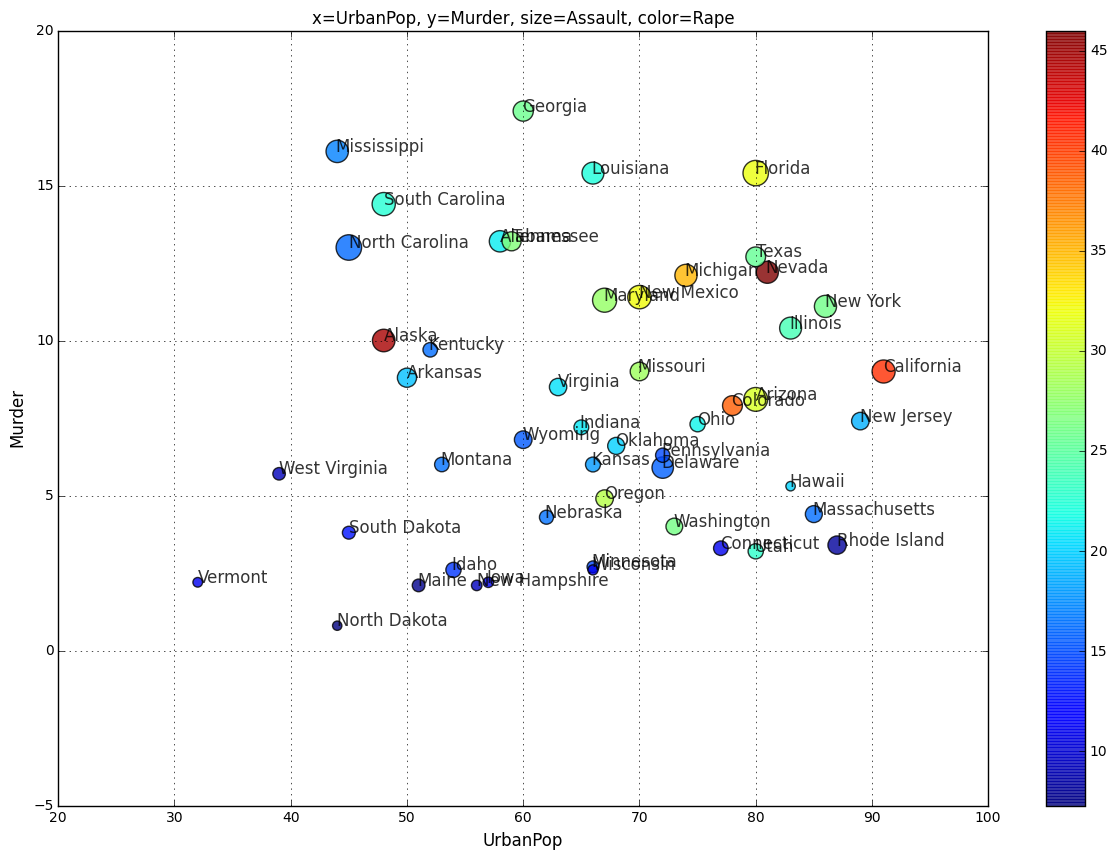

In [39]:
# ノード（点）のサイズや色に意味をもたせた散布図を作成する

names, name_label = df.dropna().ix[:, 0], "States"
x_axis, x_label = df.dropna()["UrbanPop"], "UrbanPop"
y_axis, y_label = df.dropna()["Murder"], "Murder"
sizes, size_label = df.dropna()["Assault"], "Assault" 
colors, color_label = df.dropna()["Rape"], "Rape"

plt.figure(figsize=(15, 10))
for x, y, name in zip(x_axis, y_axis, names):
    plt.text(x, y, name, alpha=0.8, size=12)
plt.scatter(x_axis, y_axis, s=sizes, c=colors, alpha=0.8)
plt.colorbar(alpha=0.8)
plt.title("x=%s, y=%s, size=%s, color=%s" % (x_label, y_label, size_label, color_label))
plt.xlabel(x_label, size=12)
plt.ylabel(y_label, size=12)
plt.grid()
plt.show()

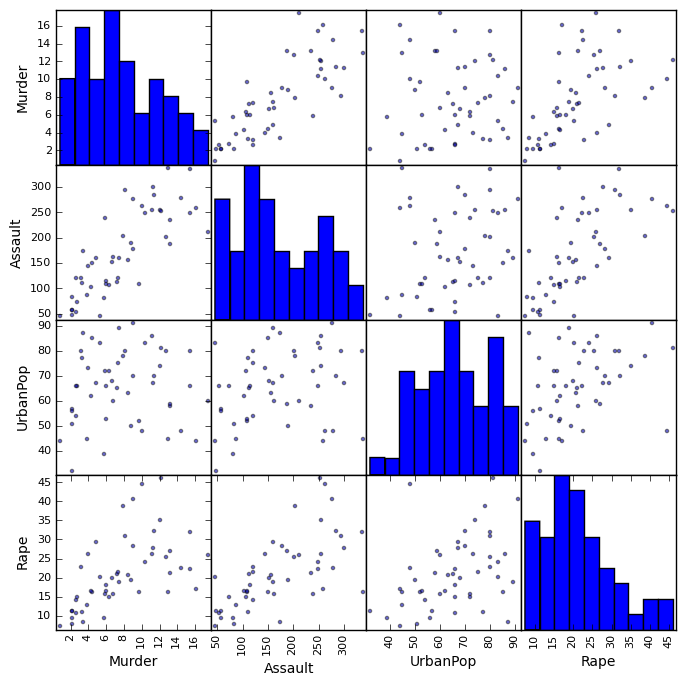

In [25]:
# 散布図行列
plotting.scatter_matrix(df.dropna()[df.columns[1:5]], figsize=(8, 8)) 
plt.show()

In [27]:
# 相関行列
pd.DataFrame(np.corrcoef(df.dropna().iloc[:, 1:5].T.as_matrix().tolist()), 
             columns=df.columns[1:5], index=df.columns[1:5])

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


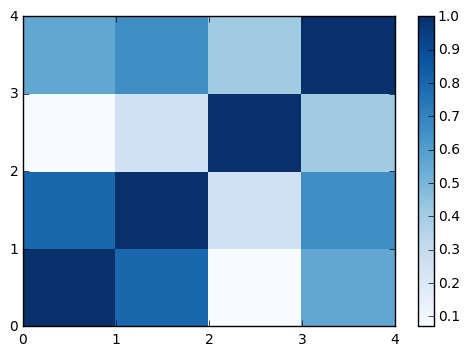

In [28]:
# 相関行列をカラーマップで見やすく。上下が逆になっていることに注意。
corrcoef = np.corrcoef(df.dropna().iloc[:, 1:5].T.as_matrix().tolist())
plt.pcolor(corrcoef, cmap=plt.cm.Blues)
plt.colorbar()
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlim([0, len(corrcoef)])
plt.ylim([0, len(corrcoef)])
plt.show()

以上の解析結果から、Murder, Assault, UrbanPop, Rape の間の関係を考察してみてください。また、いくつかの具体的な州について、何か言えそうなことがあるか考察してみてください（課題２）。

# 課題

講義時間終了時に、以下の課題を指定されたメールアドレスまで送信してください。メールタイトルは「2017基礎実験」とし、学籍番号と氏名を明記すること。

__課題１__：「ニューヨークの大気状態観測値」を解析し、結果をまとめ、考察してださい。最低でも１つの図を示すこと。

__課題２__：「合州国の州別暴力犯罪率」を解析し、結果をまとめ、考察してださい。最低でも１つの図を示すこと。

__課題３__：「スポーツテストデータ」を解析し、結果をまとめ、考察してださい。最低でも１つの図を示すこと。

__課題４__：「好きなアイスクリームアンケート」を解析し、結果をまとめ、考察してださい。最低でも１つの図を示すこと。

__課題５__：「新国民生活指標データ」を解析し、結果をまとめ、考察してださい。最低でも１つの図を示すこと。

また、この実験に関して感想などがありましたら書いてくださると嬉しいです。今後の講義や実験などの改善につながるかもしれません。